In [3]:
import pandas as pd
import matplotlib.pyplot as plt

BLOOD_MICROBIOME_PATH = '/home/groups/dpwall/briannac/blood_microbiome/'
FIG_OUT_PATH = BLOOD_MICROBIOME_PATH + 'results/sequencing_lit_search/'


In [46]:
human_microbiome_results_pubmed = pd.read_csv(BLOOD_MICROBIOME_PATH + 'data/sequencing_lit_search/PubMed_Timeline_Results_by_Year.csv', skiprows=1)
WGS_genebank = pd.read_csv(BLOOD_MICROBIOME_PATH + 'data/sequencing_lit_search/WGS_in_genebank.csv', skiprows=1)

In [47]:
WGS_genebank = WGS_genebank[['Date', 'Bases.1', 'Sequences.1']]
month_to_date = {month: i/12 for i,month in enumerate(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])}

WGS_genebank['Date'] = [float(d.split(' ')[1])  + float(month_to_date[d.split(' ')[0]]) for d in WGS_genebank.Date]

/oak/stanford/groups/dpwall/computeEnvironments/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


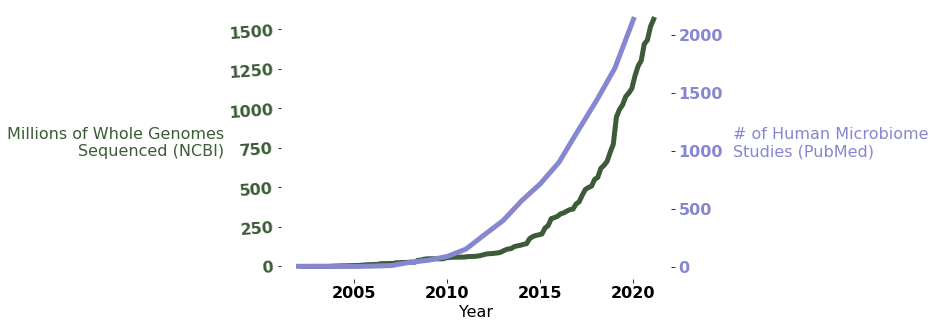

In [138]:
import matplotlib
from matplotlib.ticker import FormatStrFormatter

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(WGS_genebank['Date'], WGS_genebank['Sequences.1']/1000000, '#3b5c36',linewidth=5.0)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.tick_params(axis='y', labelcolor='#3b5c36', rotation=4)
ax.set_ylabel('Millions of Whole Genomes\nSequenced (NCBI)', color='#3b5c36', rotation=0, ha='right', va='center')
  # we already handled the x-label with ax1
ax.set_xlabel('Year')
plt.box(False)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('# of Human Microbiome\nStudies (PubMed)', color='#8687d1', rotation=0, ha='left', va='center', labelpad=10) # we already handled the x-label with ax1
ax2.plot(human_microbiome_results_pubmed[1:]['Year'],human_microbiome_results_pubmed[1:]['Count'], color='#8687d1',linewidth=5.0)
ax2.tick_params(axis='y', labelcolor='#8687d1')
plt.box(False)
plt.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(FIG_OUT_PATH + 'lit_search.svg', transparent=True, bbox_inches='tight', format='svg')
plt.savefig(FIG_OUT_PATH + 'lit_search.png', transparent=True, bbox_inches='tight', format='png', dpi=500)
plt.show()

